<a href="https://colab.research.google.com/github/riviera2015/MOLFARES/blob/master/ROC_AUC_SCORE_ACC_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification
### Generate some train/test data

In [ ]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
#!nvidia-smi


DATA MODELING

In [ ]:
# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Количество признаков
number_of_features = 100
X, y = make_classification(n_samples=1255)
                           # n_features = number_of_features,
                                      # n_informative = 3,#добавил
                                       #n_redundant = 0,
                                       #n_classes = 2,
                                       #weights = [.5, .5],
                                       #random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27)
print(y)
len(y_test)
# 400=0.318
# 377=0.3
#352=0.28

[1 0 1 ... 1 0 0]


339

EXperiments with logit

In [ ]:
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create logistic regression
logit = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')

array([0.91633466, 0.89243028, 0.94422311, 0.89641434, 0.89641434])

In [ ]:
# cross-validate model using precision
cross_val_score(logit, X, y, scoring='precision')

array([0.94117647, 0.8778626 , 0.95901639, 0.93103448, 0.92372881])

In [ ]:
# cross-validate model using recall
cross_val_score(logit, X, y, scoring='recall')

array([0.88888889, 0.91269841, 0.92857143, 0.85714286, 0.86507937])

In [ ]:
# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.27, random_state=1)

# create classifier
logit = LogisticRegression()

# train model
logit.fit(features_train, target_train)

# get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

NameError: ignored

In [ ]:
# get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.92969122, 0.07030878]])

In [ ]:
logit.classes_

array([0, 1])

In [ ]:
# calculate area under curve
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(target_test, target_probabilities)

0.9703445875391578

вариант данных-2

In [ ]:
from sklearn import datasets
from collections import Counter

X, y = datasets.make_classification(
            n_samples     = 100000,  # number of data points
            n_classes     = 2,      # number of classes
            n_clusters_per_class=2, # The number of clusters per class 
            weights       = [0.99,0.01], # The proportions assigned to each class
            n_features    = 12,     # number of total features 
            n_informative = 5,      # number of informative features 
            n_redundant   = 7,      # number of redundant features
            class_sep=0.9,
            random_state  = 0                       )
print('Original dataset shape {}'.format(Counter(y)))


Original dataset shape Counter({0: 98521, 1: 1479})


Early Stopping

In [ ]:
# Set callback functions to early stop training and save the best model so far
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [ ]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)


### Build and train a Keras classifier model as usual

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
def build_model(optimizer="rmsprop"):
    model = Sequential()
# Добавить полносвязный слой с активационной функцией ReLU
    #model.add(Dense(units=16,
       # activation="relu",
        #input_shape=(number_of_features,)))
    model.add(Dense(20, input_dim=20, activation='relu'))
    # Добавить полносвязный слой с активационной функцией ReLU
    #model.add(Dense(units=16, activation="relu"))

    model.add(Dense(40, activation='relu'))
    # Добавить полносвязный слой с сигмоидальной активационной функцией
    #model.add(Dense(units=1, activation="sigmoid"))
    model.add(Dense(1, activation='sigmoid'))
    # Скомпилировать нейронную сеть
    model.compile(
        loss="binary_crossentropy", # Перекрестная энтропия
        optimizer=optimizer,  # Оптимизатор
        metrics=["accuracy"]) # Точностный показатель результативности
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
#keras_model = KerasClassifier(build_fn=build_model, verbose=1)
#вариант старый 
#keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

#CCCCCCCCCCCCCCCCCCC
# Train neural network
history = keras_model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=200, # Number of epochs
                      callbacks=callbacks, # Early stopping\
                      batch_size=100, verbose=1, validation_split=0.3,
                      #verbose=0, # Print description after each epoch
                      #batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Epoch 1/200
7/7 [==============================] - 0s 25ms/step - loss: 0.7969 - accuracy: 0.4774 - val_loss: 0.7527 - val_accuracy: 0.4873
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.7286 - accuracy: 0.5039 - val_loss: 0.7085 - val_accuracy: 0.5418
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5382 - val_loss: 0.6725 - val_accuracy: 0.6036
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.5897 - val_loss: 0.6411 - val_accuracy: 0.6436
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6286 - accuracy: 0.6537 - val_loss: 0.6123 - val_accuracy: 0.7018
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6005 - accuracy: 0.7051 - val_loss: 0.5830 - val_accuracy: 0.7600
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.7410 - val_loss: 0.5561 - val_accuracy: 0.7891
Epoch 8/200
7/7 [=========

In [ ]:
# Обернуть модель Keras, чтобы она могла 
# использоваться библиотекой scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
neural_network = KerasClassifier(build_fn=build_model, verbose=0)

# Создать гиперпараметрическое пространство
epochs = [5, 10]
batches = [5, 10]
optimizers = ["rmsprop", "adam"]
features, target = X,y
# Создать словарь вариантов гиперпараметров
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)
score_metric = 'accuracy'
# Создать объект решеточного поиска
grid = GridSearchCV(estimator=neural_network, 
                    param_grid=hyperparameters,
                    scoring=score_metric,
                    n_jobs=1,
                    refit=True,
                    return_train_score=True,
                    cv=10)
# Выполнить подгонку объекта решеточного поиска
grid_result = grid.fit(features, target)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print('Best parameters: %s' % grid_result.best_params_)
print('CV Accuracy of best parameters: %.3f' % 
      grid_result.best_score_)

Best parameters: {'batch_size': 5, 'epochs': 10, 'optimizer': 'rmsprop'}
CV Accuracy of best parameters: 0.917


In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
        activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', 
        activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', 
        activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 
        'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
          'epochs': [100, 500],
          'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy',
                       cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Trying a randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=neural_network, 
                    param_distributions=hyperparameters, n_iter=10, 
    scoring=score_metric, n_jobs=1, refit=True, cv=10, )
random_search.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff87ca4b2e8>,
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'batch_size': [5, 10],
                                        'epochs': [5, 10],
                                        'optimizer': ['rmsprop', 'adam']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

построить лосс акьюраси

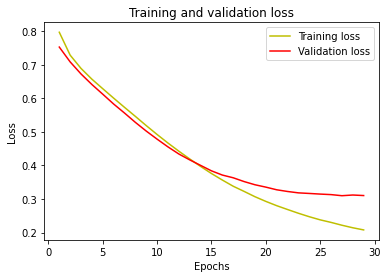

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

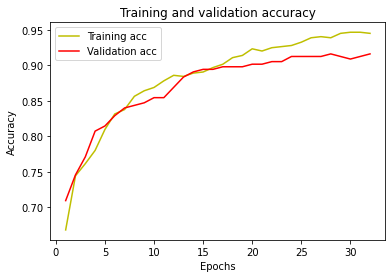

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test_accuracy

In [ ]:
test_loss, test_acc = keras_model.evaluate(X_test, y_test)
test_acc

11/11 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.9027


0.9026548862457275

In [ ]:
filepath = "keras_model.h5"

checkpoint_param = {
    "filepath": filepath,
    "monitor": "val_categorical_accuracy",
    "verbose": 1,
    "save_best_only": True,
    "mode": "max"
}
checkpoint = ModelCheckpoint(**checkpoint_param)

lr_decay_params = {
    "monitor": "val_loss",
    "factor": 0.5,
    "patience": 2,
    "min_lr": 1e-5
}
#lr_decay = ReduceLROnPlateau(**lr_decay_params)

#early_stopping = EarlyStopping(monitor="val_loss", patience=4, verbose=1)

### Use trained Keras model to predict test inputs and generate ROC data
* fpr: False positive rate
* tpr: True positive rate

False Positive Rate$$
FPR=\frac{FP}
{N}=\frac{FP}
{FP+TN}\\
$$
Where FP is the number of false positives, TN is the number of true negatives and N=FP+TN is the total number of negatives.
True Positive Rate$$
TPR=\frac{TP}
{P}=\frac{TP}
{FN+TP}\\
$$
Where TP is the number of true positives, FN is the number of false negatives and P=FN+TP is the total number of positives.


PREDICTION

In [ ]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import average_precision_score

print(accuracy_score(y_pred_keras.round(), y_test))
print(precision_score(y_pred_keras.round(), y_test))
print(recall_score(y_pred_keras.round(), y_test))
print(f1_score(y_pred_keras.round(), y_test))
#print(thresholds_keras)

0.9292035398230089
0.9157303370786517
0.9476744186046512
0.9314285714285714


In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.9693279363528509


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print(accuracy_score(y_pred_rf.round(), y_test))
print(precision_score(y_pred_rf.round(), y_test))
print(recall_score(y_pred_rf.round(), y_test))
print(f1_score(y_pred_rf.round(), y_test))



0.9351032448377581
0.9213483146067416
0.9534883720930233
0.9371428571428573


Метрики точности

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_keras.round()))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       161
           1       0.95      0.92      0.93       178

    accuracy                           0.93       339
   macro avg       0.93      0.93      0.93       339
weighted avg       0.93      0.93      0.93       339



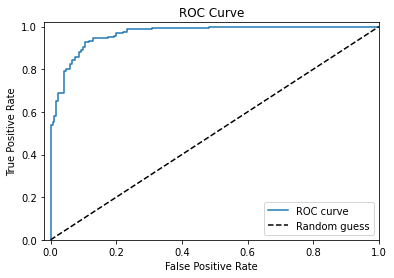

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_keras)# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")


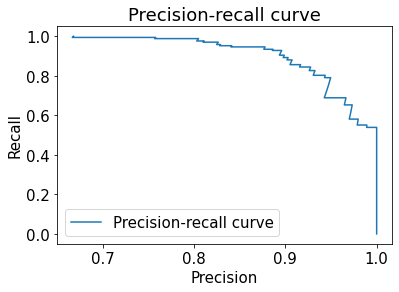

In [ ]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_keras)# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")


Построение матрицы ошибок

http://localhost:8888/notebooks/Desktop/ALL_FOR_METR/roc_auc_mc.ipynb

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
        Plots the confusion matrix either numbers or proportions
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.style.use('bmh')
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size=20)
    plt.grid(None)
    plt.ylabel('Истинный класс', size=22)
    plt.xlabel('Прогнозируемый класс', size=22)
    plt.tight_layout()

In [ ]:
import numpy as np
def plot_Confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          color_bar=False,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import matplotlib 
    import numpy as np
    import itertools

    # https://matplotlib.org/examples/pylab_examples/fonts_demo.html
    font = {'family' : 'sans-serif',
        'weight' : 'medium',      
        'size'   : 15}

    matplotlib.rc('font', **font)
    
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap,
              )
               
#     plt.title(title)
    if color_bar:
        plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
#         plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]*100),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True class')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted class')
    plt.show()

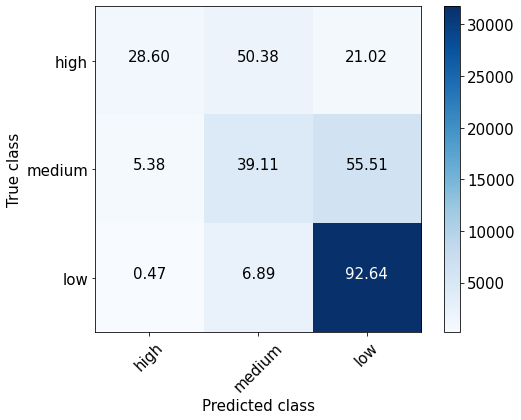

In [ ]:
plot_Confusion_matrix(cm = np.array([[ 1098,  1934,   807],
                                              [  604,  4392,  6233],
                                              [  162,  2362, 31760]]), 
                      normalize    = True,
                      target_names = ['high', 'medium', 'low'],
                      color_bar = True,
                      title        = "Confusion Matrix")

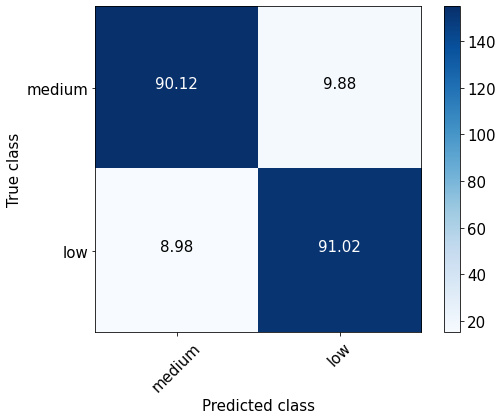

In [ ]:
#Confusion_matrix kode
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred_keras.round()) 
#
plot_Confusion_matrix(cm, 
                      normalize    = True,
                      target_names = ['medium', 'low'],
                      color_bar = True,
                      title        = "Confusion Matrix")
#plot_confusion_matrix(cm, classes = [0, 1])
#plot_confusion_matrix(cm, classes = [0, 1], normalize=True)

Confusion matrix, without normalization
[[152   9]
 [ 15 163]]
Normalized confusion matrix
[[0.94409938 0.05590062]
 [0.08426966 0.91573034]]


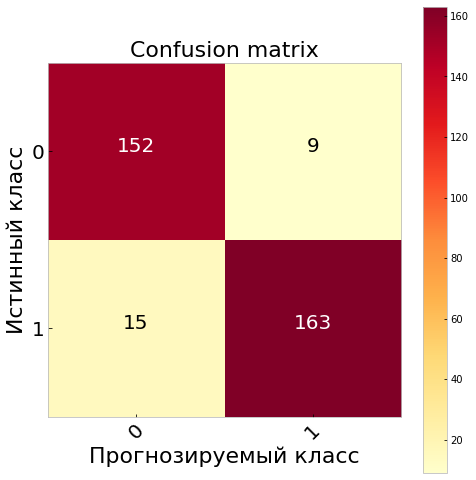

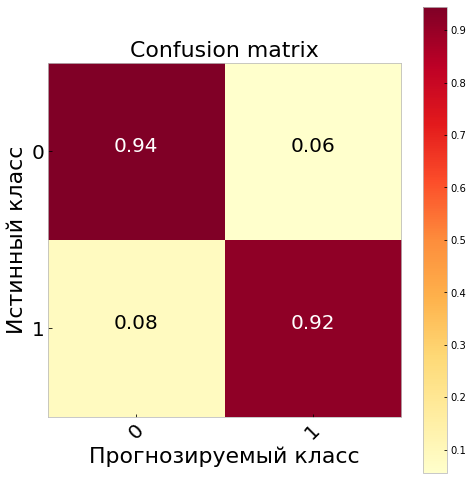

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred_keras.round()) 
plot_confusion_matrix(cm, classes = [0, 1])
plot_confusion_matrix(cm, classes = [0, 1], normalize=True)

всякие построения см

In [ ]:
def plot_precision_recall(test_y, probs, title='Precision Recall Curve', threshold_selected=None):
    """Plots precision recall curve 
    """
    precision, recall, threshold = precision_recall_curve(test_y, probs)
    plt.figure(figsize=(10, 10))
    no_skill = len(test_y[test_y==1]) / len(test_y)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='Random')

    step_kwargs = ({'step': 'post'})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    fscore = (2 * precision * recall) / (precision + recall)

    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (threshold[ix], fscore[ix]))
    plt.scatter(recall[ix], precision[ix], marker='o', color='red', label='Best')

    plt.xlabel('Recall', size=24)
    plt.ylabel('Precision', size=24)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title, size=24)
    plt.xticks(size=18)
    plt.yticks(size=18)

    if threshold_selected:
        p = precision[np.where(threshold == threshold_selected)[0]]
        r = recall[np.where(threshold == threshold_selected)[0]]
        plt.scatter(r, p, marker='*', s=600, c='r')
        plt.vlines(r, ymin=0, ymax=p, linestyles='--')
        plt.hlines(p, xmin=0, xmax=r, linestyles='--')
        plt.text(r - 0.1, p + 0.15,
                 s='Threshold: '+round(threshold_selected, 2), size=20, fontdict={'weight': 1000})
        plt.text(r - 0.2, p + 0.075,
                 s='Precision: ' + round(100 * p[0], 2)+'Recall: ' + round(100 * r[0], 2), size=20,
                 fontdict={'weight': 1000})

    pr = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1],
                       'threshold': threshold})
    return pr

def plot_roc_curve(test_y, probs, title='ROC Curve', threshold_selected=None):
    """Plots ROC Curve
    """
    ns_probs = [0 for _ in range(len(test_y))]

    fpr, tpr, threshold = roc_curve(test_y, probs)
    ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))
    plt.figure(figsize=(10, 10))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')

    step_kwargs = ({'step': 'post'})
    plt.step(fpr, tpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(fpr, tpr, alpha=0.2, color='b', **step_kwargs)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best')

    plt.xlabel('False Positive Rate', size=24)
    plt.ylabel('True Positive Rate', size=24)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(title, size=24)
    plt.xticks(size=18)
    plt.yticks(size=18)

    if threshold_selected:
        p = fpr[np.where(threshold == threshold_selected)[0]]
        r = tpr[np.where(threshold == threshold_selected)[0]]
        plt.scatter(r, p, marker='*', s=600, c='r')
        plt.vlines(r, ymin=0, ymax=p, linestyles='--')
        plt.hlines(p, xmin=0, xmax=r, linestyles='--')
        plt.text(r - 0.1, p + 0.15,
                 s='Threshold: '+round(threshold_selected, 2), size=20, fontdict={'weight': 1000})
        plt.text(r - 0.2, p + 0.075,
                 s='fpr: '+round(100 * p[0], 2) + 'Recall: '+round(100 * r[0], 2), size=20,
                 fontdict={'weight': 1000})
    pr = pd.DataFrame({'fpr': fpr[:-1], 'tpr': tpr[:-1],
                       'threshold': threshold[:-1]})
    return pr

Best Threshold=0.544095, G-Mean=0.933
Best Threshold=0.544095, F-Score=0.934


,precision,recall,threshold
0,0.552795,1.000000,0.001953
1,0.551402,0.994382,0.002278
2,0.553125,0.994382,0.002674
3,0.554859,0.994382,0.003005
4,0.556604,0.994382,0.003037
...,...,...,...
317,1.000000,0.028090,0.999604
318,1.000000,0.022472,0.999614
319,1.000000,0.016854,0.999692
320,1.000000,0.011236,0.999807


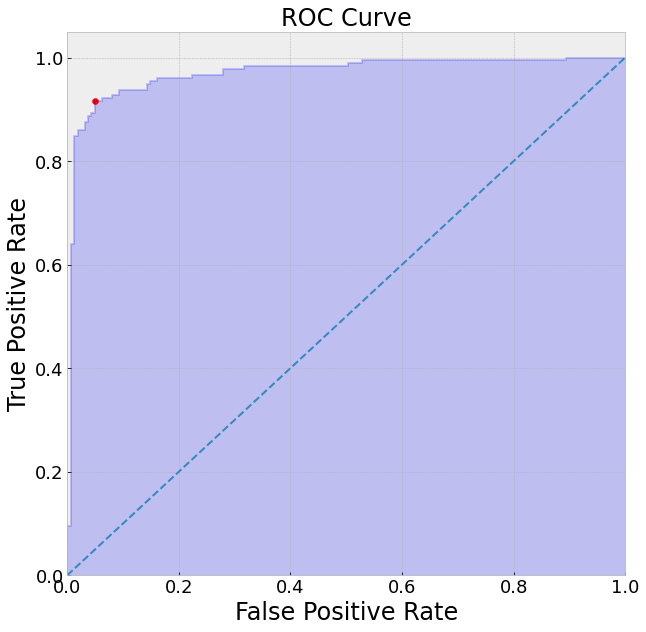

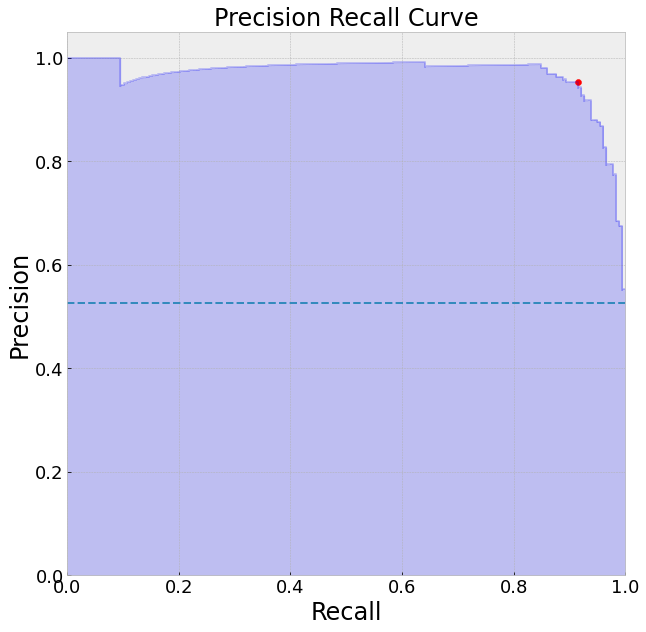

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_curve 
plot_roc_curve(y_test, y_pred_keras)
plot_precision_recall(y_test, y_pred_keras)

ONE OTHER CONFUSION MATRIX
http://localhost:8888/notebooks/Desktop/Confusion_Matrix_Plot.ipynb

In [ ]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          color_bar=False,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import matplotlib 
    import numpy as np
    import itertools

    # https://matplotlib.org/examples/pylab_examples/fonts_demo.html
    font = {'family' : 'sans-serif',
        'weight' : 'medium',      
        'size'   : 15}

    matplotlib.rc('font', **font)
    
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap,
              )
               
#     plt.title(title)
    if color_bar:
        plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
#         plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]*100),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True class')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted class')
    plt.show()

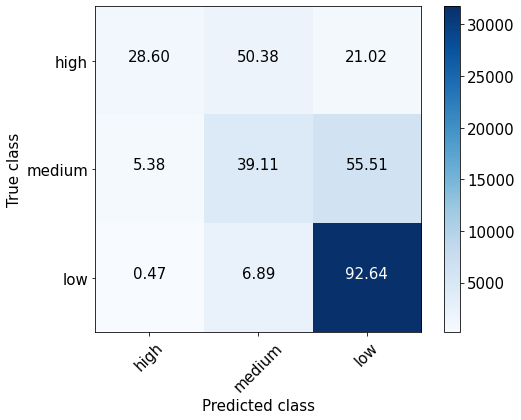

In [ ]:
plot_confusion_matrix(cm = np.array([[ 1098,  1934,   807],
                                              [  604,  4392,  6233],
                                              [  162,  2362, 31760]]), 
                      normalize    = True,
                      target_names = ['high', 'medium', 'low'],
                      color_bar = True,
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected,y_pred=predicted)
conf_df=pd.DataFrame(confusion,index=range(10), columns = range(10))
import seaborn as sns
axes =sns.heatmap(conf_df, annot =true, ) 

еще один вариант см

In [ ]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

### Calculate AUC (area under curve)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

## Train another classifier to compare with Keras model

In [ ]:
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

NameError: ignored

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

0.9667873555215151


### Plot the ROC curve

NameError: ignored

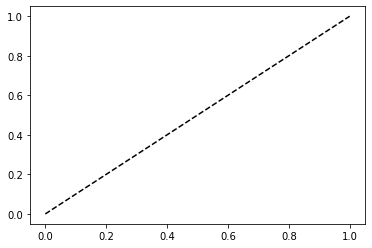

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Benign (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label=' (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix 
#cm= confusion_matrix(name_as_indexes_test,y_pred)
#print(cm)

## (Optional) Prediction probability density function(PDF)

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt

def plot_pdf(y_pred, y_test, name=None, smooth=500):
    positives = y_pred[y_test == 1]
    negatives = y_pred[y_test == 0]
    N = positives.shape[0]
    n = N//smooth
    s = positives
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    plt.plot(x, f(x))

    N = negatives.shape[0]
    n = N//smooth
    s = negatives
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    plt.plot(x, f(x))
    plt.xlim([0.0, 1.0])
    plt.xlabel('density')
    plt.ylabel('density')
    plt.title('PDF-{}'.format(name))
    plt.show()

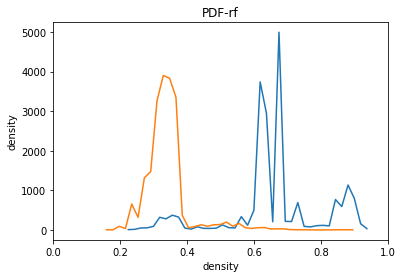

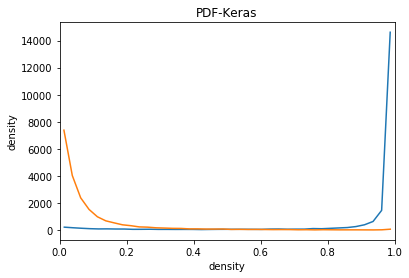

In [ ]:
plot_pdf(y_pred_rf, y_test, 'rf')
plot_pdf(y_pred_keras, y_test, 'Keras')

# Multi-class classification

### Generate some train/test data
3 classes to classify

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, n_features=20, n_informative=3, n_redundant=0, n_classes=n_classes,
    n_clusters_per_class=2)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(y[:2])

[[0 0 1]
 [1 0 0]]


### Build and train Keras model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
400/400 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.7085
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3889 - accuracy: 0.8567
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8756
Epoch 4/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3125 - accuracy: 0.8831
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8899
Epoch 6/10
400/400 [==============================] - 0s 1ms/step - loss: 0.2819 - accuracy: 0.8961
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.9003
Epoch 8/10
400/400 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.9040
Epoch 9/10
400/400 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9103
Epoch 10/10
400/400 [==============================] - 0s 1ms/step - loss: 0.2402 - accuracy: 0.9148

### Make prediction for test inputs

In [ ]:
y_score = keras_model2.predict(X_test)
print(y_test)

[[0 0 1]
 [0 1 0]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix

predictions_one_hot = keras_model2.predict(X_test)
cm = confusion_matrix(labels_one_hot.argmax(axis=1), predictions_one_hot.argmax(axis=1))
print(cm)

In [ ]:
#print(confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1)))
confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))

In [ ]:
#Confusion_matrix kode
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_score.round()) 
#
plot_Confusion_matrix(cm, 
                      normalize    = True,
                      target_names = ['Low', 'Medium', 'Low'],
                      color_bar = True,
                      title        = "Confusion Matrix")

ValueError: ignored

### Plot ROC for each of the 3 classes

Use micro and marco averaging to evaluate the overall performance across all classes.
$$
precision=PRE=\frac{TP}
{TP+FP}\\
$$
 In “micro averaging”, we’d calculate the performance, e.g., precision, from the individual true positives, true negatives, false positives, and false negatives of the the k-class model:
$$
PRE_{micro}=\frac{TP_{1}+\dots+TP_{k}}
{TP_{1}+\dots+TP_{k}+FP_{1}+\dots+FP_{k}}\\
$$
And in macro-averaging, we average the performances of each individual class:
$$
PRE_{marco}=\frac{PRE_{1}+\dots+PRE_{k}}
{k}\\
$$

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

IndexError: ignored

multiclass

In [ ]:
from sklearn import datasets
from collections import Counter

X, y = datasets.make_classification(
            n_samples     = 100000,  # number of data points
            n_classes     = 3,      # number of classes
            n_clusters_per_class=2, # The number of clusters per class 
            weights       = [0.7, 0.27, 0.03], # The proportions assigned to each class
            n_features    = 12,     # number of total features 
            n_informative = 5,      # number of informative features 
            n_redundant   = 7,      # number of redundant features
            class_sep=0.9,
            random_state  = 0                       )
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 69637, 1: 27056, 2: 3307})


In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, n_features=20, n_informative=3, n_redundant=0, n_classes=n_classes,
    n_clusters_per_class=2)
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
400/400 [==============================] - 0s 1ms/step - loss: 0.8173 - accuracy: 0.6172
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.6003 - accuracy: 0.7630
Epoch 3/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7843
Epoch 4/10
400/400 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7946
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.8026
Epoch 6/10
400/400 [==============================] - 1s 1ms/step - loss: 0.4895 - accuracy: 0.8071
Epoch 7/10
400/400 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.8124
Epoch 8/10
400/400 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8149
Epoch 9/10
400/400 [==============================] - 1s 1ms/step - loss: 0.4555 - accuracy: 0.8191
Epoch 10/10
400/400 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8205

In [ ]:
y_score_ked = keras_model2.predict(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


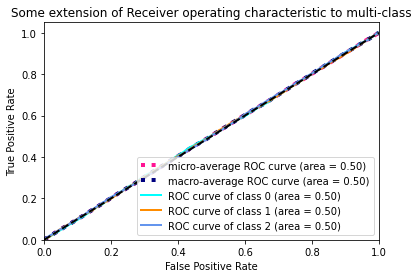

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

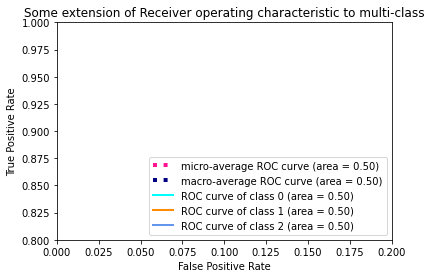

In [ ]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()